<br>
<center><font size=8><b>Web Crawling Project:</b></font></center>

<br>
<center><font size=6><b><mark>Gather all links</mark> within the domain of a web page</b></font></center>

<font color='black'>
    ====================================================================================================================</font>

<br>
<center><font size=6><b>Programming Design</b></font></center>
<br>

# Modules:
### 1. "House Keeping" Work: <font size=4>Simple Tasks to handle OS stuff</font>
### 2. class "LinkFinder": <font size=4>Find links on a page and store them</font>
### 3. class "Spider": <font size=4>Crawl all the links and write them to files</font>

<font color='black'> ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- </font>

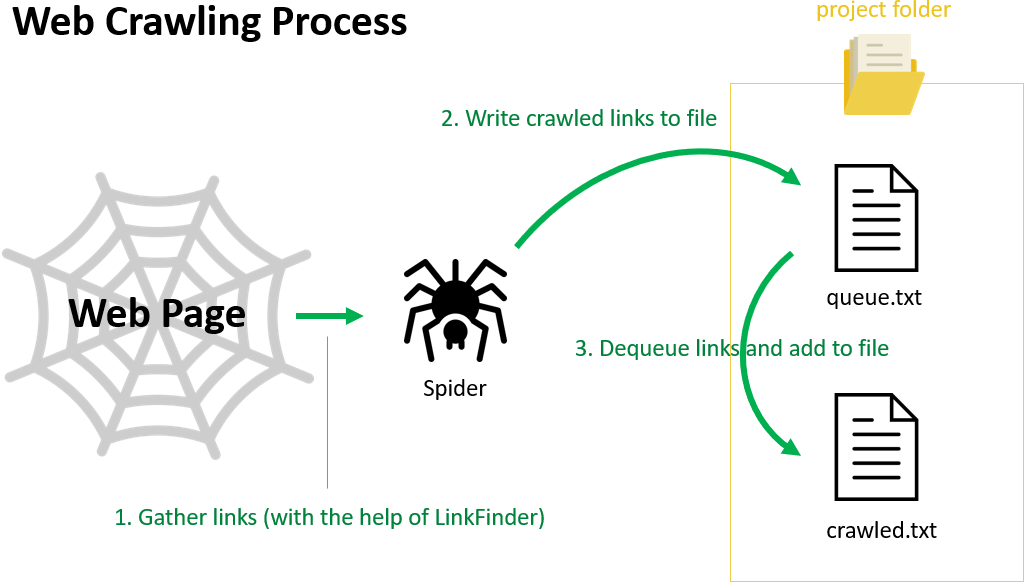

<font color='black'> ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- </font>

# <center>First Step: Gather links (with the help of LinkFinder)</center>

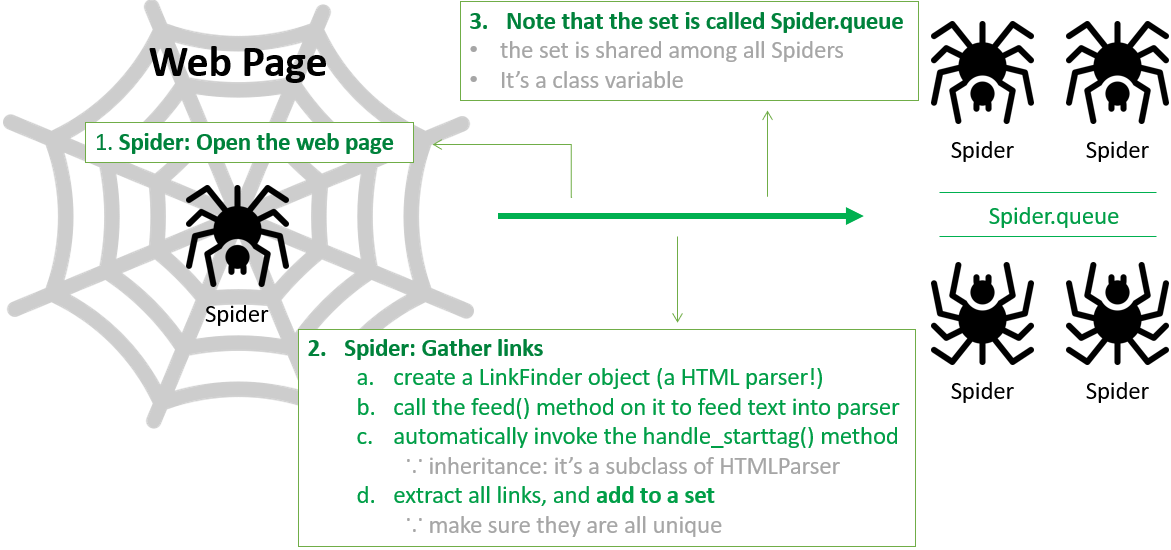

# <center>Second and Third Step: Add links to files by turns</center>

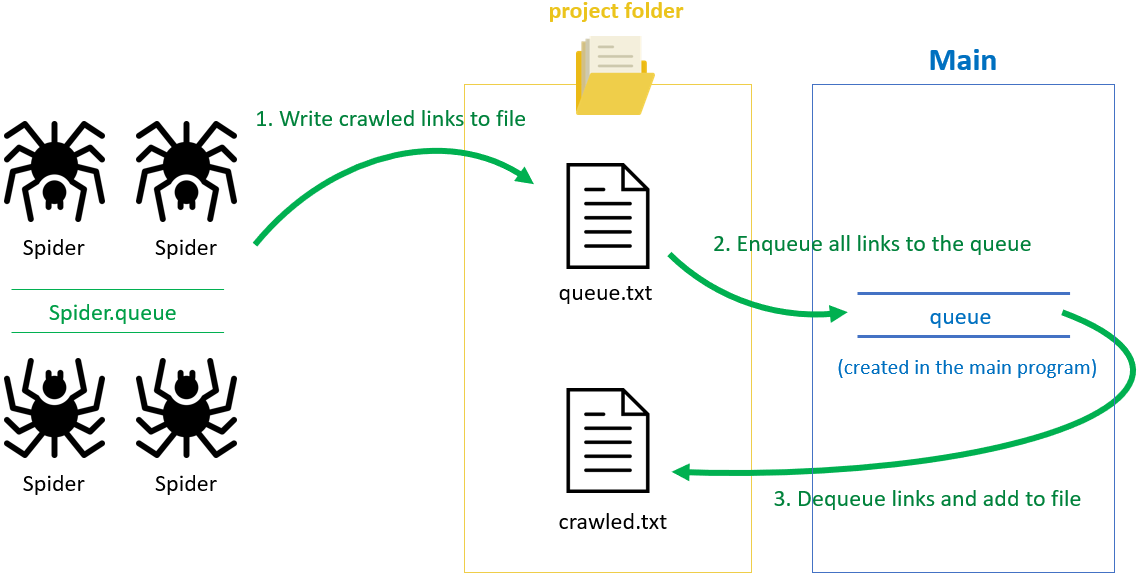

Note that the main program created the **queue** and the **first spider** first, so then the "First Step" was executable.

<font color='black'>
    ====================================================================================================================</font>

# Modules

## 1. "House Keeping" Work: Simple Tasks to handle OS stuff
<font size=4> **Functions**</font>
* <font size=3>**create_project_dir**: Create a folder for your web crawling project, which is going to contain two files.</font>
* <font size=3>**create_data_files**: Create two files <br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**a. queue.txt**: a waiting list with links ready to be crawled<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**b. crawled.txt**: file to put the crawled links into</font>
* <font size=3>**write_file**: Used by create_data_files, to write data to an existing file. (queue.txt / crawled.txt)</font>
* <font size=3>**append_to_file**: Add data into an existing file. (queue.txt / crawled.txt)</font>
* <font size=3>**delete_file_content**: Delete the contents of a file</font>
* <font size=3>**file_to_set**: Read a file (queue.txt) and add each line to a set. This is to ensure that we don't crawl the same page twice.</font>
* <font size=3>**set_to_file**: Iterate through a set, each item will be written as a new line to a file (crawled.txt)</font>

## 2. class "LinkFinder": Find links on a page and store them
#### Usage: Help Spider objects to gather links 
<font size=4> **Attributes**</font>
* <font size=3>**page_url**: the web page to be crawled</font>
* <font size=3>**base_url**: used just for string formatting on url parsing (as the domain name)</font>
* <font size=3>**links**: a set to contain all unique links. It will be accessed through the property: page_links</font>

<font size=4>**Methods**</font>
* <font size=3>**page_links (property)**: Access all the unique links stored in this object</font>

## 3. class "Spider": Crawl all the links and write them to files
<font size=4> **Class Variables**</font>
* <font size=3>**project_name**: the name of the folder(working directory)</font>
* <font size=3>**base_url**: the HOMEPAGE, put into main-program queue and passed into LinkFinder's constructor</font>
* <font size=3>**domain_name**: the domain of the HOMEPAGE</font>
* <font size=3>**queue_file**: a string = 'project_name/queue.txt'; a reference to the file</font>
* <font size=3>**crawled_file**: a string = 'project_name/crawled.txt'; a reference to the file</font>
* <font size=3>**queue**: a set containing all unique links to be crawled; written to queue.txt later on</font>
* <font size=3>**crawled**: a set containing all unique links that are crawled; written to crawled.txt later on</font>

<font size=4>**Methods**</font>
* <font size=3>**boot**: Create project folder and two files; initialize Spider.queue and Spider.crawled using file_to_set() function. This is used only by the First Spider.</font>
* <font size=3>**crawl_page**: Do all the First, Second, and Third Step in the above illustrations; Gather links from a page_url and add them to files.</font>

# Main

<font size=3>1. **Create an empty queue**</font><br>
<font size=3>2. **Instantiate the First Spider**, which adds HOMEPAGE to the queue (Initialization)</font><br>
<font size=3>3. **Call create_workers()** to create worker threads</font><br>
* **which will invoke work() as the target of threads**
* **In work(): Dequeue and get the first item of the queue, an url**(eg. HOMEPAGE at the beginning)**, then pass it into Spider.crawl_page().**
* **In Spider.crawl_page(): gather all links from the given url, and update the files(queue.txt and crawled.txt)**(eg. put HOMEPAGE to crawled.txt but all links on HOMEPAGE to queue.txt)

<font size=3>4. **Call crawl()**: Check if there are items in the queue.txt; if so, crawl them</font><br>
* In crawl(): **if the queue.txt is not empty, invoke create_jobs()**
* In create_jobs(): put all links in queue.txt to main-program queue **for the Spiders(/threads) to crawl**
* In create_jobs(): **all the links must be crawled** before we go to the next round, **invoking crawl() again (recursively)**
* **Spiders will update the files along the way, if the queue.txt is still not empty...back to square one**

<font color='black'>
    ====================================================================================================================</font>

# 1. "House Keeping" Work: <font size=4>Simple Tasks to handle OS stuff</font>

In [ ]:
import os

In [ ]:
# Each website you crawl is a separate object (folder)
def create_project_dir(directory):
    """create a directory for our project"""
    if not os.path.exists(directory):
        print('Creating project: ', directory)
        os.makedirs(directory)

In [ ]:
# Creating queue and crawled files (if not created)
def create_data_files(project_name, base_url):
    """Create two files (if not created):
            1. queue file: a waiting list to store all the links
            2. crawled file: the actual file to store the crawled content from the links in the queue file
        
        NOTE: the base_url is the starting point, which is the homepage
    """
    queue = project_name + '/queue.txt'
    crawled = project_name + '/crawled.txt'
    
    if not os.path.isfile(queue):
        write_file(queue, base_url)
        
    if not os.path.isfile(crawled):
        write_file(crawled, '')

In [ ]:
def write_file(filename, data):
  fh = open(filename, "w")
  try:
      fh.write(data)
  finally: # Always
      fh.close()

In [ ]:
def append_to_file(path, data):
    """Add data into an existing file"""
    with open(path, 'a') as file:
        file.write(data + '\n')

In [ ]:
def delete_file_content(path):
    """# Delete the contents of a file"""
    with open(path, 'w'): # data cleaned
        pass

In [ ]:
def file_to_set(file_name):
    """Read a file and add each line to a set (to ensure unique values)"""
    result = set()
    with open(file_name, 'rt') as file: # 'rt': read text
            for line in file:
                result.add(line.replace('\n',''))
    return result

In [ ]:
def set_to_file(links, file_path):
    """Iterate through a set, each item will be a new line in the file"""
    delete_file_content(file_path)
    for link in links:
        append_to_file(file_path, link)

# 2. Create class: LinkFinder <font size=4>(Find links on a page and store them)</font>

In [ ]:
from html.parser import HTMLParser
from urllib import parse

In [ ]:
class LinkFinder(HTMLParser): # inheritance
    def __init__(self, base_url, page_url):
        super().__init__()
        self.base_url = base_url # the homepage, just for string formatting
        self.page_url = page_url
        self.links = set()
    
    def handle_starttag(self, tag, attrs):
        """
        When we call HTMLParser feed() on this class, this function is called when it encounters an opening tag. 
        Only when it encounters an opening tag <a> will we extract the link out of the text, and add it to our set: self.links;
        otherwise, we do nothing.
        """
        if tag == 'a':
            for (attribute, value) in attrs:
                if attribute == 'href':
                    url = parse.urljoin(self.base_url, value) # handle the situation where we don't have the domain in href
                    self.links.add(url)
    
    @property
    def page_links(self):
        return self.links
    
    def error(self, message):
        pass

# 3. Create class: Spider <font size=4>(Crawl all the links and write them to files)</font>

In [ ]:
from urllib.request import urlopen

In [ ]:
class Spider:
    
    # class variables (shared among all instances)
    project_name = ''
    base_url = ''
    domain_name = ''
    queue_file = ''
    crawled_file = ''
    queue = set()
    crawled = set()
    
    def __init__(self, project_name, base_url, domain_name):
        Spider.project_name = project_name
        Spider.base_url = base_url
        Spider.domain_name = domain_name
        Spider.queue_file = Spider.project_name + '/queue.txt'
        Spider.crawled_file = Spider.project_name + '/crawled.txt'
        
        self.boot()
        self.crawl_page('First Spider', Spider.base_url)
    
    @staticmethod
    def boot():
        # used by the first Spider
        create_project_dir(Spider.project_name)
        create_data_files(Spider.project_name, Spider.base_url)
        Spider.queue = file_to_set(Spider.queue_file)
        Spider.crawled = file_to_set(Spider.crawled_file)
    
    @staticmethod
    def crawl_page(thread_name, page_url):
        """Gather all links from page_url and add to Spider.queue; Move page_url to Spider.crawled; Update two files"""
        # used by all Spiders(/threads)
        if page_url not in Spider.crawled:
            print(thread_name, 'now crawling', page_url)
            print('Queue', len(Spider.queue), '| Crawled ', len(Spider.crawled))
            Spider.add_links_to_queue(Spider.gather_links(page_url))
            Spider.queue.remove(page_url) # Spider.queue is actually a set!
            Spider.crawled.add(page_url)
            Spider.update_files()
    
    # =============== Used internally, like C++ private instance functions ===============
    @staticmethod
    def gather_links(page_url):
        # used by crawl_page()
        html_string = ''
        try:
            response = urlopen(page_url)
            if response.getheader('Content-Type') == 'text/html':
                html_bytes = response.read()
                html_string = html_bytes.decode("utf-8")
            
            finder = LinkFinder(Spider.base_url, page_url)
            finder.feed(html_string)
        except:
            print('Error: cannot crawl page')
            return set()
        
        return finder.page_links
    
    @staticmethod
    def add_links_to_queue(links):
        # used by crawl_page()
        for url in links:
            if url in Spider.queue: # make sure we skip links that's already in queue
                continue
            if url in Spider.crawled: # make sure we skip links that's already crawled
                continue
            if Spider.domain_name not in url: # make sure we DON'T crawl across the Internet!
                continue
            Spider.queue.add(url)
    
    @staticmethod
    def update_files():
        # used by crawl_page()
        set_to_file(Spider.queue, Spider.queue_file)
        set_to_file(Spider.crawled, Spider.crawled_file)

# 4. Main Program

In [ ]:
from urllib.parse import urlparse

<font size=4>urllib.parse**.urlparse**(urlstring, scheme='', allow_fragments=True)</font>
* __Parse a URL into 6 components__, returning a 6-item named tuple. 
* This corresponds to the <u>general structure of a URL</u>: **scheme://<mark>netloc</mark>/path;parameters?query#fragment** <br>
&emsp;&emsp; **scheme**: URL scheme specifier<br>
&emsp;&emsp; **<mark>netloc</mark>**: Network location part<br>
&emsp;&emsp; **path**: Hierarchical path<br>
&emsp;&emsp; **params**: Parameters for last path element<br>
&emsp;&emsp; **query**: Query component<br>
&emsp;&emsp; **fragment**: Fragment identifier<br>
* Each tuple item is a **string**, possibly empty.
* Examples are as follows:

In [ ]:
def get_sub_domain_name(url):
    """Get sub domain name (name.example.com)"""
    try:
        return urlparse(url).netloc
    except:
        return ''

In [ ]:
def get_domain_name(url):
    """Get domain name (example.com)"""
    try:
        result = get_sub_domain_name(url).split('.')
        return result[-2] + '.' + result[-1]
    except:
        return ''

In [ ]:
from tkinter import *

In [ ]:
def kick_off():
#     global PROJECT_NAME
#     global HOMEPAGE
#     global DOMAIN_NAME
#     global QUEUE_FILE
#     global CRAWLED_FILE
#     global NUMBER_OF_THREADS
    
#     PROJECT_NAME = (input('Enter project name(or just hit ENTER for default value): ') or 'python document')
#     HOMEPAGE = (input('Enter homepage(or just hit ENTER for default value): ') or 'https://docs.python.org/3/library/')
#     DOMAIN_NAME = get_domain_name(HOMEPAGE)
#     QUEUE_FILE = PROJECT_NAME + '/queue.txt'
#     CRAWLED_FILE = PROJECT_NAME + '/crawled.txt'
#     NUMBER_OF_THREADS = int(input('Enter number of threads(or just hit ENTER for default value): ') or '8')
    
    def Ok():
        global PROJECT_NAME
        global HOMEPAGE
        global DOMAIN_NAME
        global QUEUE_FILE
        global CRAWLED_FILE
        global NUMBER_OF_THREADS
        
        PROJECT_NAME = entry_1.get()
        HOMEPAGE = entry_2.get()
        DOMAIN_NAME = get_domain_name(HOMEPAGE)
        QUEUE_FILE = PROJECT_NAME + '/queue.txt'
        CRAWLED_FILE = PROJECT_NAME + '/crawled.txt'
        NUMBER_OF_THREADS = int(entry_3.get())
        
        window.destroy()
        
    
    window = Tk()
    window.attributes("-topmost", True)
    
    window.title("Web Scraping")

    lbl_1 = Label(window, text="Project Name: ", font="Arial 15")
    lbl_1.grid(row=0, column=0)

    lbl_2 = Label(window, text="Home Page: ", font="Arial 15")
    lbl_2.grid(row=1, column=0)

    lbl_3 = Label(window, text="Number of Threads: ", font="Arial 15")
    lbl_3.grid(row=2, column=0)

    entry_1 = Entry(window, font="Arial 15")
    entry_1.insert(END, string='testing')
    entry_1.grid(row=0, column=1)

    entry_2 = Entry(window, font="Arial 15")
    entry_2.insert(END, string='https://docs.python.org/3/library/')
    entry_2.grid(row=1, column=1)

    entry_3 = Entry(window, font="Arial 15")
    entry_3.insert(END, string='8')
    entry_3.grid(row=2, column=1)

    btn = Button(window, text="Ok", font="Arial 15", command=Ok)
    btn.grid(row=3, columnspan=2)
    

    window.mainloop()

## Daemon thread執行緒
有時候我們在實作multithread的程式時，當我們結束main thread之後，會發現其他thread仍然還在執行，造成必須利用kill command來結束整個程式的窘境。這樣的設計issue相信很多人都曾經遇到過，而python是怎麼解決這樣的問題呢?答案是透過建立Daemon thread的方式。

Daemon thread是一種在背景執行的thread，具有和main thread一同終止的特性，使用方式很簡單，<font size = 3.5><b>只要將新產生的thread設定為Daemon thread即可</b></font>。藉由這種daemon thread，我們就可以實作出**當主程式結束後，其所產生的thread能同時結束**的程式。

In [ ]:
def create_workers():
    """Create worker threads (will die when main exits)"""
    for _ in range(NUMBER_OF_THREADS):
        t = threading.Thread(target=work) # 初始化Thread object, target為新thread所要實作的function
        t.daemon = True # #將 t 設定為 daemon thread
        t.start() # 啟動 t thread, 執行 work()

In [ ]:
def work():
    """Get urls from the queue and crawl them"""
    while True:
        url = queue.get() # dequeue
        Spider.crawl_page(threading.current_thread().name, url) # Gather all links within url to queue.txt; Put url to crawled.txt
        queue.task_done() # Indicate that a formerly enqueued task is complete (so that we will not be blocked by the below queue.join()
    # Run until the queue is empty.

### queue 源碼
**<font color=green>def</font>** <font color=blue>task_done</font>(self): <br>
<font style="color:rgb(202,56,25)">
 """<br>
 Indicate that a formerly enqueued task is complete.<br>
<br>
 Used by Queue consumer threads. For each get() used to fetch a task,
 a subsequent call to task_done() tells the queue that the processing
 on the task is complete.<br>
<br>
 If a join() is currently blocking, it will resume when all items
 have been processed (meaning that a task_done() call was received
 for every item that had been put() into the queue).<br>
<br>
 Raises a ValueError if called more times than there were items
 placed in the queue.<br>
 """
 </font>

In [ ]:
import threading # speed up I/O-bound tasks: file I/O
from queue import Queue

In [ ]:
def crawl():
    """Check if there are items in the queue, if so crawl them"""
    # This functionis called in the main program, earlier than created_jobs
    queued_links = file_to_set(QUEUE_FILE)
    if len(queued_links) > 0:
        print(len(queued_links), 'links in the queue')
        
        create_jobs()

In [ ]:
def create_jobs():
    """Each queued link is a new job, create them!"""
    for link in file_to_set(QUEUE_FILE):
        queue.put(link) # enqueue; This is the main-program queue, not Spider.queue!
    
    queue.join() # Blocks until all items in the queue have been gotten and processed
                 # This makes sure all the threads don't bump into each other
    
    crawl() # Indirect Recursion

## Initializations... (start running codes form here)

In [ ]:
kick_off()

In [ ]:
print('project name: ', PROJECT_NAME)
print('homepage: ', HOMEPAGE)
print('num of threads: ', NUMBER_OF_THREADS)

## Ready to Crawl!

In [ ]:
queue = Queue() # create an empty queue
Spider(PROJECT_NAME, HOMEPAGE, DOMAIN_NAME) # instantiate the first Spider, which adds HOMEPAGE to queue (Initialization)
create_workers()
crawl()